The MNIST dataset consistes of labeled handwritten digite from 0-9. 

Size of the image is 28*28

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import numpy as np

#print("tensoorflow version:",tf.VERSION)
#load data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


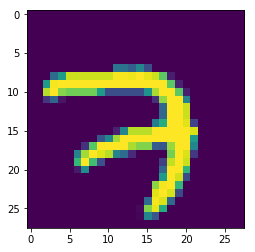

In [3]:
#Example of MNIST dataset
image = mnist.train.images[0,:]
image.resize(28,28)
plt.imshow(image)

In [0]:
#Save image data to file

#save the first 10 image as an example
for i in range(10):
  image_data = mnist.train.images[i,:]
  image_data = image_data.reshape(28,28)
  filename = 'mnist_train_%d.tiff'%i
  #older version
  #scipy.misc.toimage(image_data, cmin=0.0, cmax=1.0).save(filename)
  #works on .tiff files
  Image.fromarray(image_data).save(filename)

In [5]:
#One-hot representation of labels
print(mnist.train.labels[0,:])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Sofxmax Regression

It is for multi-class classification

Similar to logistic regression, logistic regression only classify two classes. 

In mnist dataset we have 10 classes(0-9), the goal is to calculate the probability of the input in each class and the result is the class with the maxmum probability. 




In [6]:
#input image 
x = tf.placeholder(tf.float32, [None, 784])

# weights: size 10D array of 784
W = tf.Variable(tf.zeros([784, 10]))

# bias
b = tf.Variable(tf.zeros([10]))
# output y
y = tf.nn.softmax(tf.add(tf.matmul(x, W), b))
# ground truth of output prediction
y_ = tf.placeholder(tf.float32, [None, 10])

#loss, cross entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y)))

#optimization algorithm: gradient decent 0.01 learning rate
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:

#create tf session
sess = tf.InteractiveSession()
#initialize variable
tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})

In [8]:
#calculate model accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy of the softmax regression model:",sess.run(accuracy, feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

Accuracy of the softmax regression model: 0.9161


In [10]:
#test the model using one example of the test data set
x_test = mnist.test.images[0,:]
x_test = np.reshape(x_test,(1,784))
y_test = mnist.test.labels[0,:]
#print(np.shape(x_val))
print("predicted",sess.run(tf.argmax(y,1), feed_dict={x:x_test}), "\nactual:", np.argmax(y_test.reshape(1,10),1))

predicted [7] 
actual: [7]
